# Data Exploration

In [23]:
# --- Cell 1: Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set_theme(style="whitegrid")


In [24]:
# --- Cell 2: Load data ---
# Assuming your file is a CSV inside PharmaCast/input
data_path = "../input/salesweekly.csv"   # update filename if different
df = pd.read_csv(data_path)

# Preview data
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
1,1/12/2014,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2,1/19/2014,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
3,1/26/2014,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
4,2/2/2014,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


In [25]:
# --- Cell 3: Basic info ---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   302 non-null    object 
 1   M01AB   302 non-null    float64
 2   M01AE   302 non-null    float64
 3   N02BA   302 non-null    float64
 4   N02BE   302 non-null    float64
 5   N05B    302 non-null    float64
 6   N05C    302 non-null    float64
 7   R03     302 non-null    float64
 8   R06     302 non-null    float64
dtypes: float64(8), object(1)
memory usage: 21.4+ KB


In [26]:
# --- Cell 4: Summary statistics ---
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,35.102441,27.167611,27.060295,208.627161,61.740853,4.138935,38.439811,20.224561
std,8.617106,7.043491,8.086458,76.069221,22.436970,3.129265,22.900873,11.381464
min,7.670000,6.237000,3.500000,86.250000,18.000000,0.000000,2.000000,1.000000
25%,29.387500,22.387500,21.300000,149.300000,47.000000,2.000000,21.000000,11.475000
50%,34.565000,26.789500,26.500000,198.300000,57.000000,3.979167,35.000000,17.500000
75%,40.175000,31.046500,32.475000,252.471500,71.000000,6.000000,51.000000,26.000000
max,65.330000,53.571000,60.125000,546.899000,154.000000,17.000000,131.000000,65.000000


In [27]:
# --- Cell 5: Check missing values ---
df.isna().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

In [28]:
# --- Cell 6: Convert date column ---
df['datum'] = pd.to_datetime(df['datum'])
df = df.sort_values(by="datum")

# Set date as index for time series work
df.set_index("datum", inplace=True)

df.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
datum,,,,,,,,
2014-01-05,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
2014-01-12,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2014-01-19,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
2014-01-26,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
2014-02-02,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


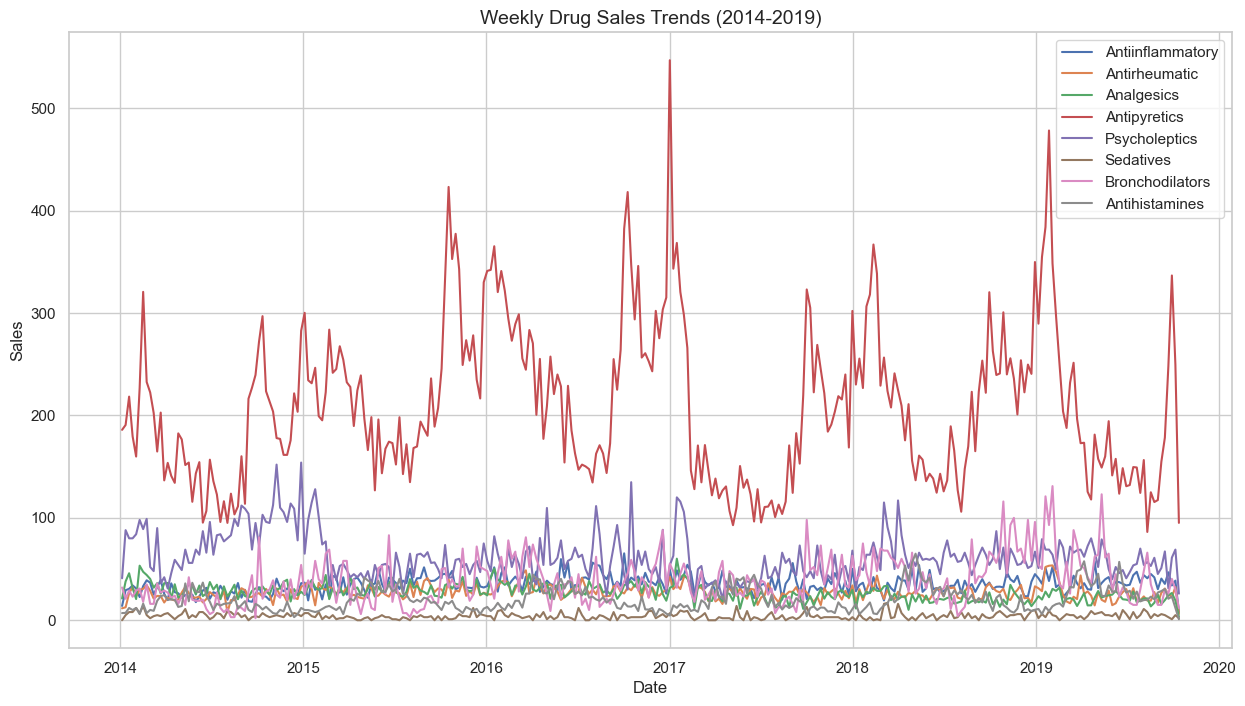

In [36]:
# --- Cell 7: Plot trends of all drug categories ---
plt.figure(figsize=(15,8))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.title("Weekly Drug Sales Trends (2014-2019)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [32]:

# Mapping dictionary
column_mapping = {
    "datum": "datum",
    "M01AB": "Antiinflammatory",
    "M01AE": "Antirheumatic",
    "N02BA": "Analgesics",
    "N02BE": "Antipyretics",
    "N05B": "Psycholeptics",
    "N05C": "Sedatives",
    "R03": "Bronchodilators",
    "R06": "Antihistamines"
}

# Apply renaming
df = df.rename(columns=column_mapping)

# Save the cleaned dataset
df.to_csv("../input/named_data.csv", index=False)
print("✅ Cleaned CSV saved in input/named_data.csv")

✅ Cleaned CSV saved in input/named_data.csv


In [35]:
# Cell 1: Import pandas
import pandas as pd

# Cell 2: Load the two CSV files
weekly_df = pd.read_csv("../input/salesweekly.csv")
named_df = pd.read_csv("../input/named_data.csv")

# Cell 3: Extract the 'datum' column from weekly_df
datum_col = weekly_df[['datum']]

# Cell 4: Concatenate 'datum' + renamed drug columns
cleaned_df = pd.concat([datum_col, named_df], axis=1)

# Cell 5: Save to cleaned_data.csv
cleaned_df.to_csv("../input/updated_named_data.csv", index=False)

# Cell 6: Check result
print(cleaned_df.head())

       datum  Antiinflammatory  Antirheumatic  Analgesics  Antipyretics  \
0   1/5/2014             14.00          11.67        21.3        185.95   
1  1/12/2014             29.33          12.68        37.9        190.70   
2  1/19/2014             30.67          26.34        45.9        218.40   
3  1/26/2014             34.00          32.37        31.5        179.60   
4   2/2/2014             31.02          23.35        20.7        159.88   

   Psycholeptics  Sedatives  Bronchodilators  Antihistamines  
0           41.0        0.0             32.0             7.0  
1           88.0        5.0             21.0             7.2  
2           80.0        8.0             29.0            12.0  
3           80.0        8.0             23.0            10.0  
4           84.0       12.0             29.0            12.0  
